In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [38]:
df = pd.read_csv('data.csv')
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


<Axes: xlabel='Engine HP', ylabel='MSRP'>

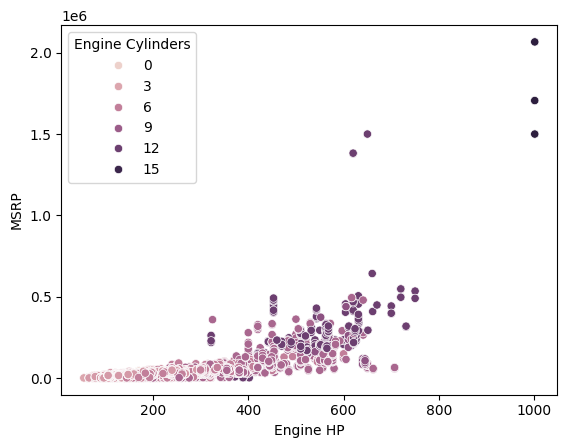

In [39]:
sns.scatterplot(data=df, x='Engine HP', y='MSRP', hue='Engine Cylinders')

<Axes: xlabel='Year', ylabel='MSRP'>

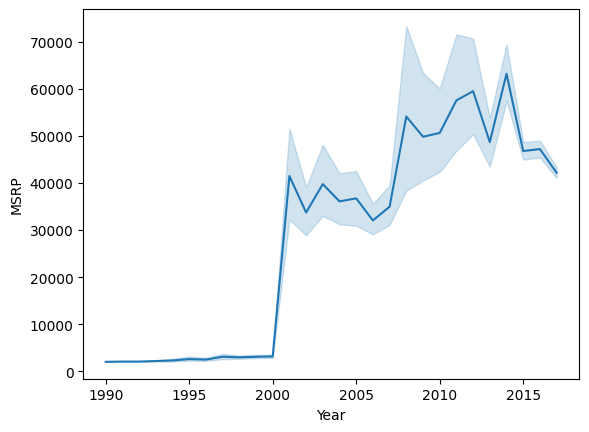

In [40]:
sns.lineplot(data=df, x='Year', y='MSRP')

<Axes: xlabel='Transmission Type', ylabel='MSRP'>

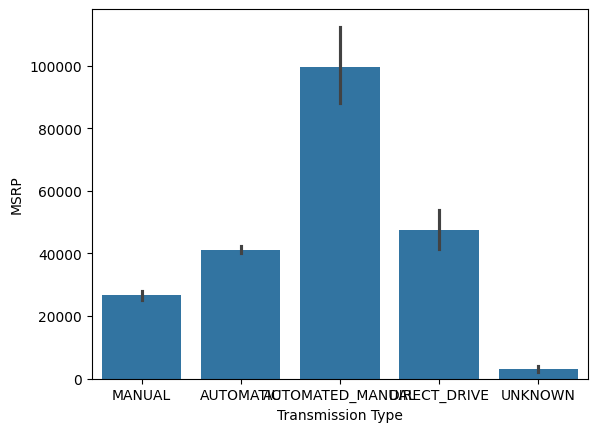

In [41]:
sns.barplot(data=df, x='Transmission Type', y='MSRP')

<Axes: xlabel='count', ylabel='Make'>

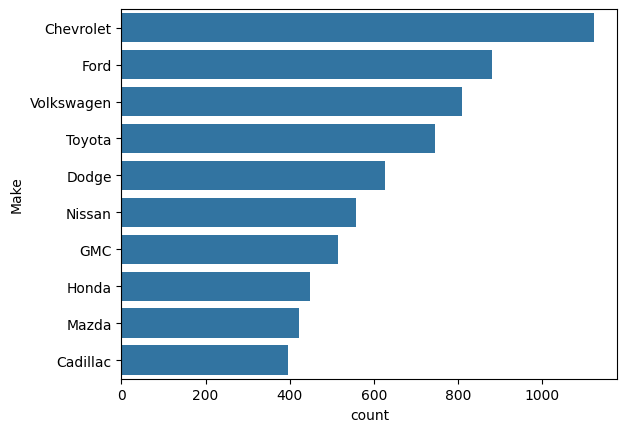

In [42]:
sns.countplot(data=df, y='Make', order=df['Make'].value_counts().iloc[:10].index) # لأول 10 ماركات

<Axes: xlabel='count', ylabel='Make'>

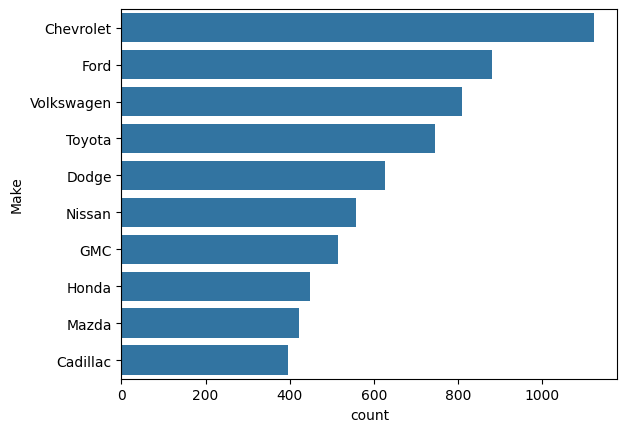

In [43]:
sns.countplot(data=df, y='Make', order=df['Make'].value_counts().iloc[:10].index) # لأول 10 ماركات

<Axes: xlabel='Vehicle Style', ylabel='MSRP'>

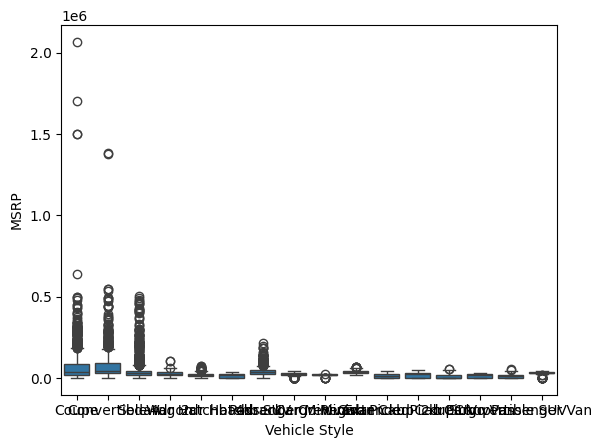

In [44]:
sns.boxplot(data=df, x='Vehicle Style', y='MSRP')

<Axes: >

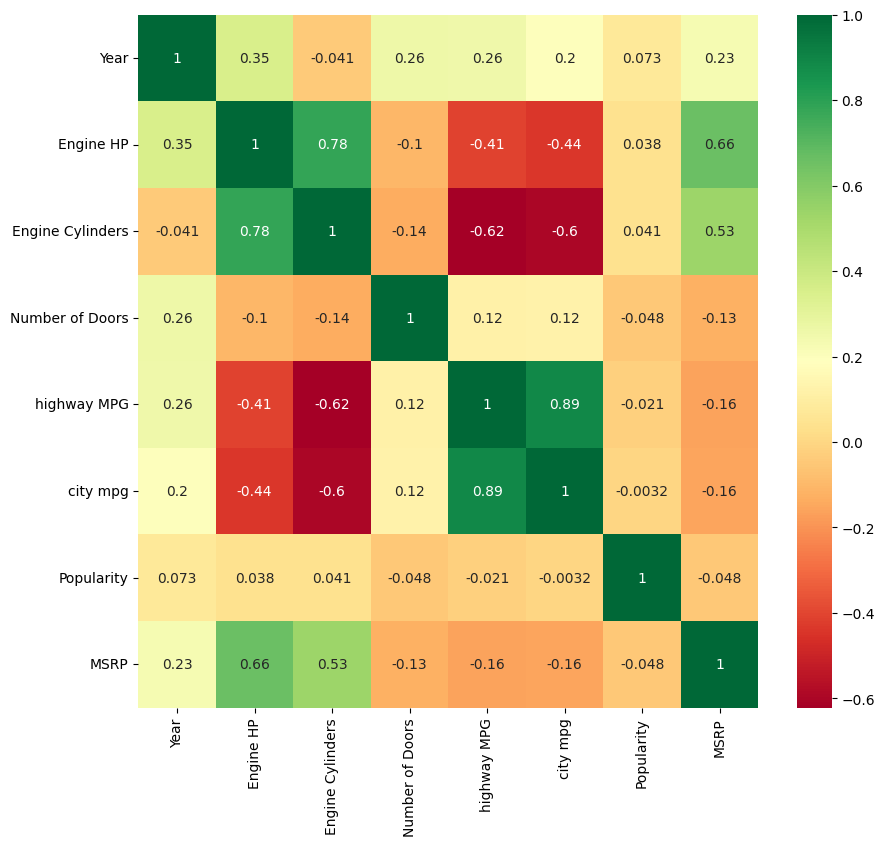

In [45]:

plt.figure(figsize=(10,9))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdYlGn')

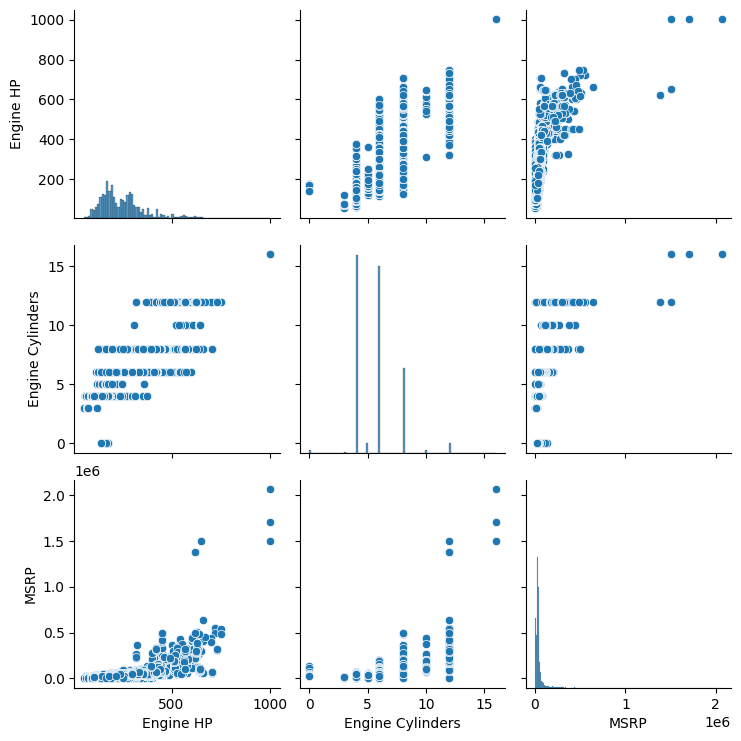

In [46]:
sns.pairplot(df[['Engine HP', 'Engine Cylinders', 'MSRP']])

> ### 👤 ALL BY HOMOSA 💻

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Chevrolet'),
  Text(1, 0, 'Ford'),
  Text(2, 0, 'Volkswagen'),
  Text(3, 0, 'Toyota'),
  Text(4, 0, 'Dodge'),
  Text(5, 0, 'Nissan'),
  Text(6, 0, 'GMC'),
  Text(7, 0, 'Honda'),
  Text(8, 0, 'Mazda'),
  Text(9, 0, 'Cadillac')])

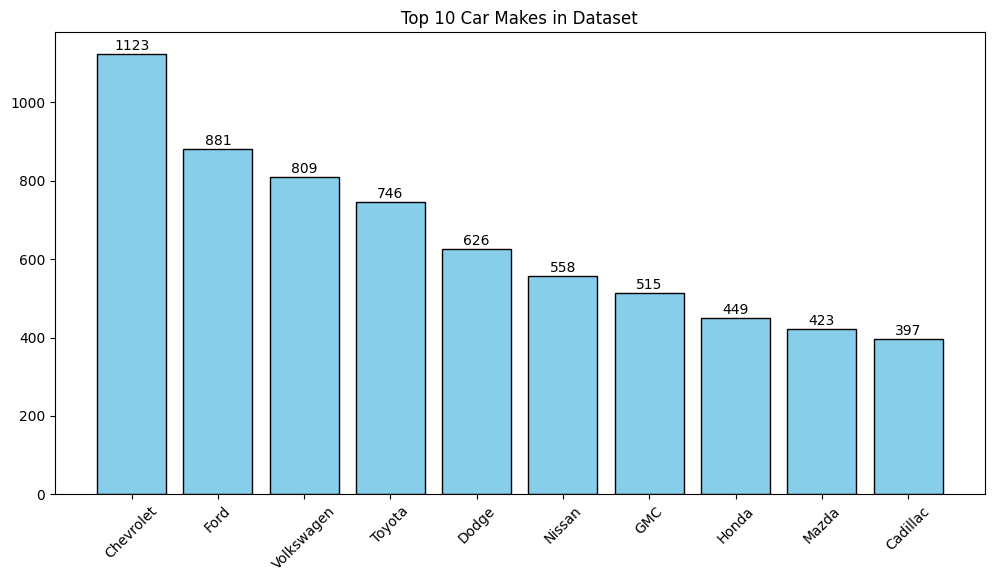

In [47]:
top_10_makes = df['Make'].value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_makes.index, top_10_makes.values, color='skyblue', edgecolor='black')

# إضافة الأرقام فوق كل عامود (تطبيق متقدم لـ Matplotlib)
for i, value in enumerate(top_10_makes.values):
    plt.text(i, value + 10, str(value), ha='center')

plt.title('Top 10 Car Makes in Dataset')
plt.xticks(rotation=45) # تدوير الأسماء عشان مت

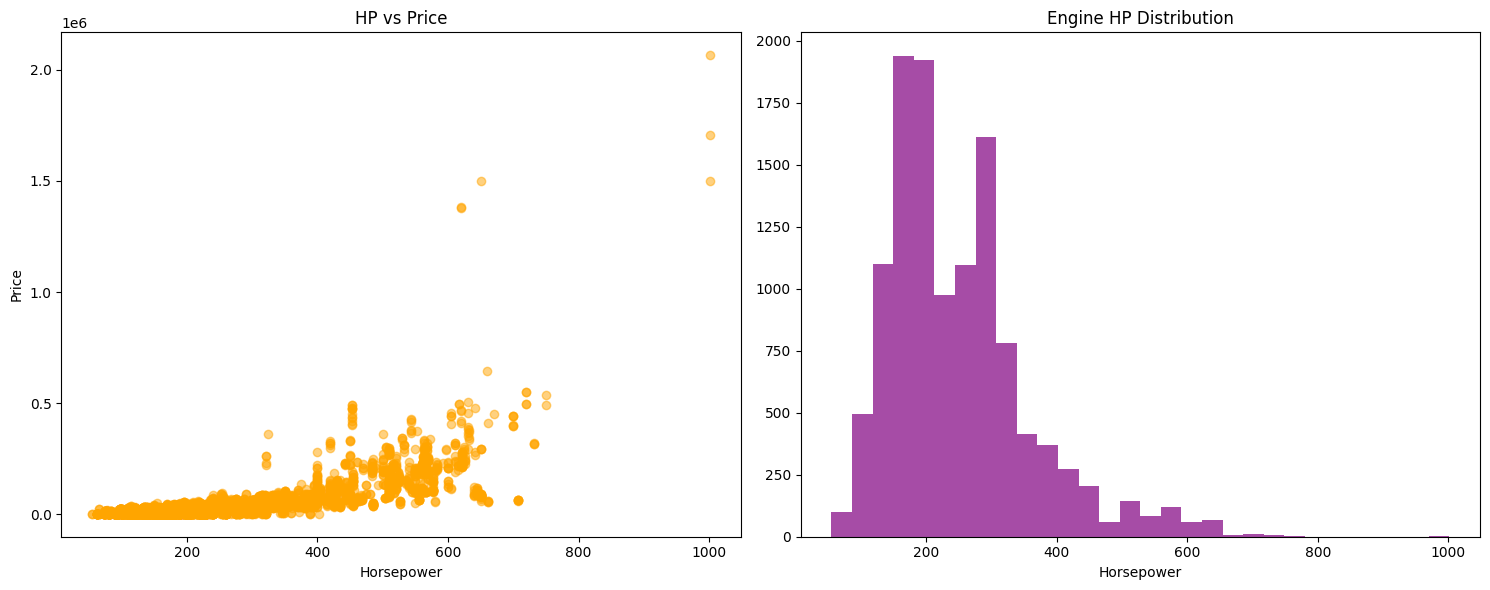

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# الرسمة الأولى (Scatter)
ax1.scatter(df['Engine HP'], df['MSRP'], alpha=0.5, color='orange')
ax1.set_title('HP vs Price')
ax1.set_xlabel('Horsepower')
ax1.set_ylabel('Price')

# الرسمة الثانية (Histogram)
ax2.hist(df['Engine HP'].dropna(), bins=30, color='purple', alpha=0.7)
ax2.set_title('Engine HP Distribution')
ax2.set_xlabel('Horsepower')

plt.tight_layout() # عشان الرسوم متبقاش لازقة في بعض
plt.show()

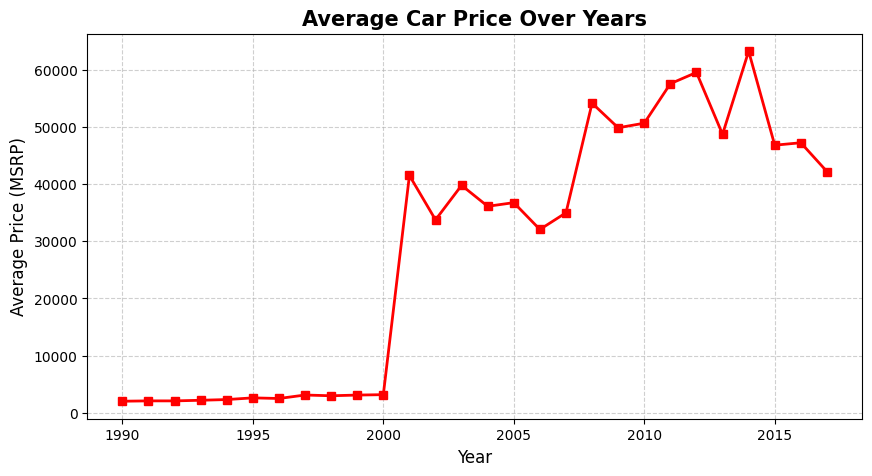

In [49]:
import matplotlib.pyplot as plt

# تجهيز البيانات: متوسط السعر لكل سنة
yearly_prices = df.groupby('Year')['MSRP'].mean()

plt.figure(figsize=(10, 5))
plt.plot(yearly_prices.index, yearly_prices.values, color='red', marker='s', linewidth=2)

# التنسيق المهم (Matplotlib Functions)
plt.title('Average Car Price Over Years', fontsize=15, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Price (MSRP)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6) # إضافة شبكة خلفية
plt.show()

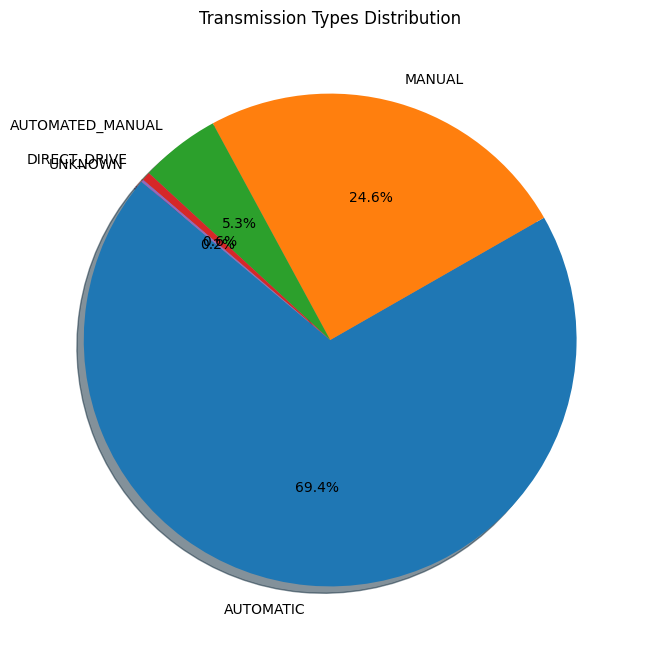

In [50]:
transmission_counts = df['Transmission Type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Transmission Types Distribution')
plt.show()

> all by homoasa 